In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999


In [3]:
train_df = pd.read_csv("C:/Users/HP/Black Friday/train.csv")
test_df = pd.read_csv("C:/Users/HP/Black Friday/test.csv")
print("Train shape: ", train_df.shape)
print("Test shape: ", test_df.shape)

Train shape:  (550068, 12)
Test shape:  (233599, 11)


In [4]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


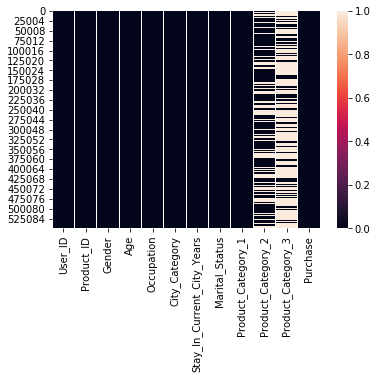

In [5]:
sns.heatmap(train_df.isnull())  #MANY DATA ARE MISSING 

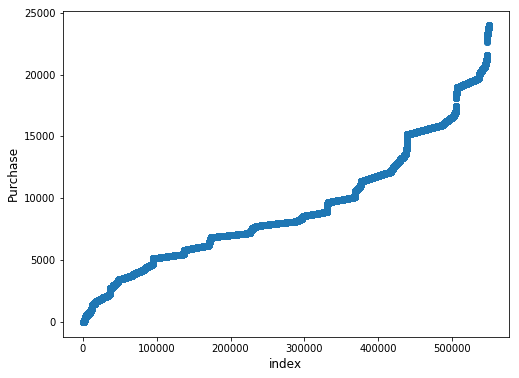

In [6]:
#TARGET VARIABLE ANALYSIS

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.Purchase.values))
plt.xlabel('index', fontsize = 12)
plt.ylabel('Purchase', fontsize = 12)
plt.show()

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


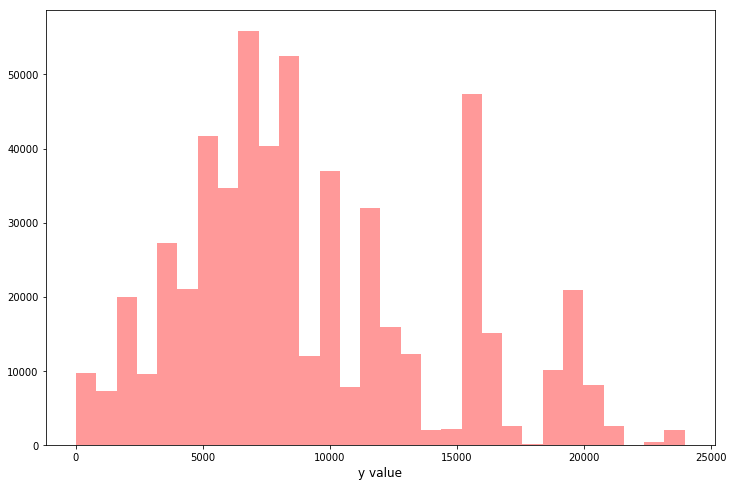

In [45]:
plt.figure(figsize=(12,8))
sns.distplot(train_df.Purchase.values, bins = 30, kde = False, color= 'red')
plt.xlabel('y value', fontsize=12)
plt.show()

In [10]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count" ,"Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,5
1,float64,2
2,object,5


In [11]:
missing_df = train_df.isnull().sum(axis = 0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df ['missing_count']>0]
missing_df = missing_df.sort_values(by = 'missing_count')
missing_df



,column_name,missing_count
9,Product_Category_2,173638
10,Product_Category_3,383247


# VISUALIZATION

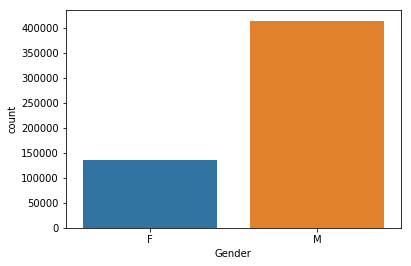

In [12]:
sns.countplot(x="Gender",data=train_df) # MALE PURCHASE IS HIGHEST

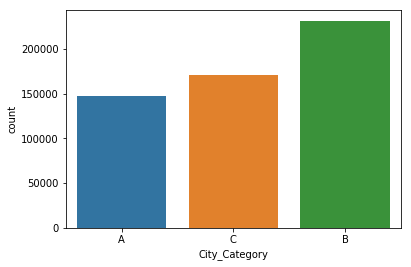

In [13]:
sns.countplot(x="City_Category",data=train_df) #HIGHEST CATEGORY IS B

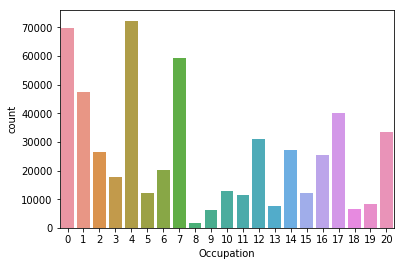

In [15]:
sns.countplot(x="Occupation",data=train_df)

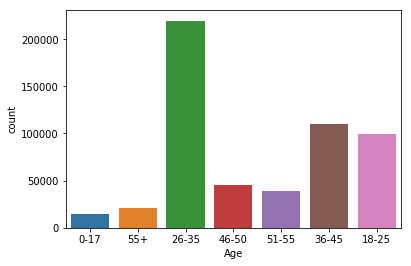

In [16]:
sns.countplot(x="Age",data=train_df) #MAX AGE IS 26-35

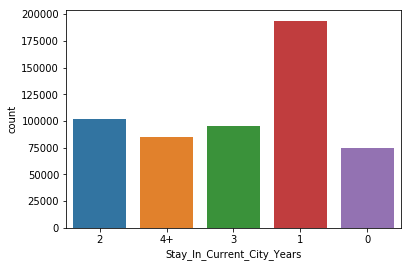

In [17]:
sns.countplot(x="Stay_In_Current_City_Years",data=train_df) #MAX IS 1 YEAR DATA

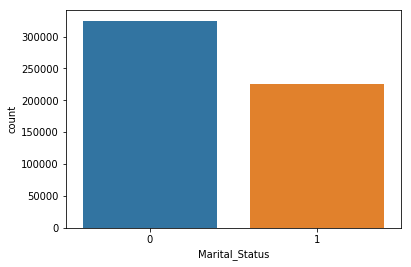

In [24]:
sns.countplot(x="Marital_Status",data=train_df) #MAX is UNMARRIED PURCHASER

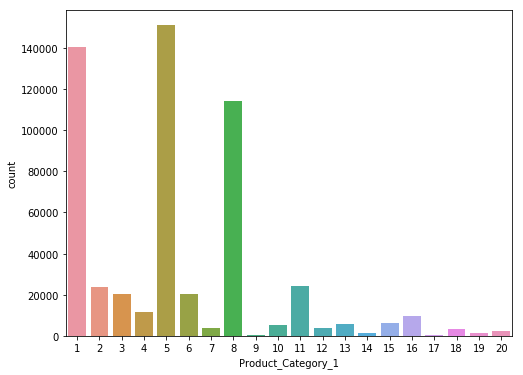

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x="Product_Category_1",data=train_df) 

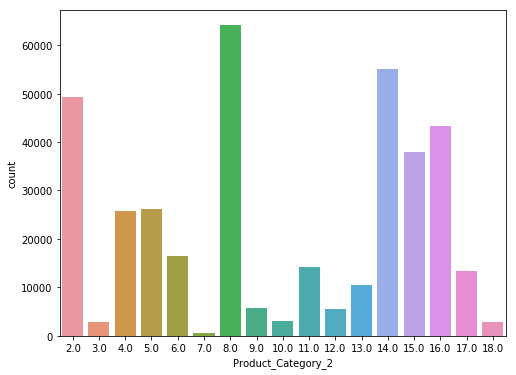

In [34]:
plt.figure(figsize=(8,6))

sns.countplot(x="Product_Category_2",data=train_df) 

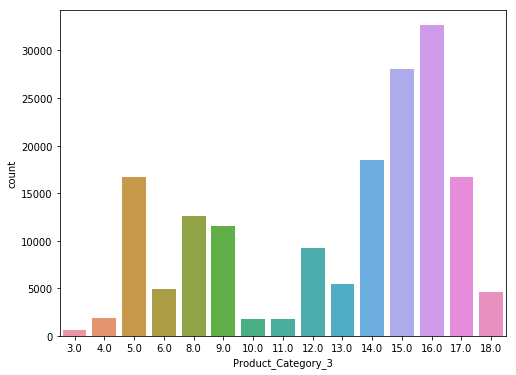

In [35]:
plt.figure(figsize=(8,6))

sns.countplot(x="Product_Category_3",data=train_df) 

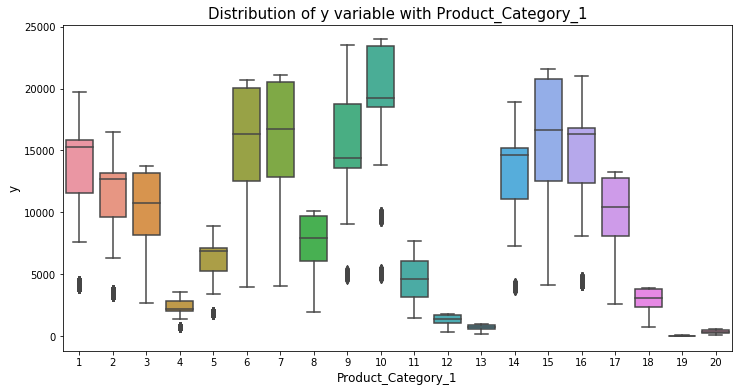

In [36]:
var_name = "Product_Category_1"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='Purchase', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()


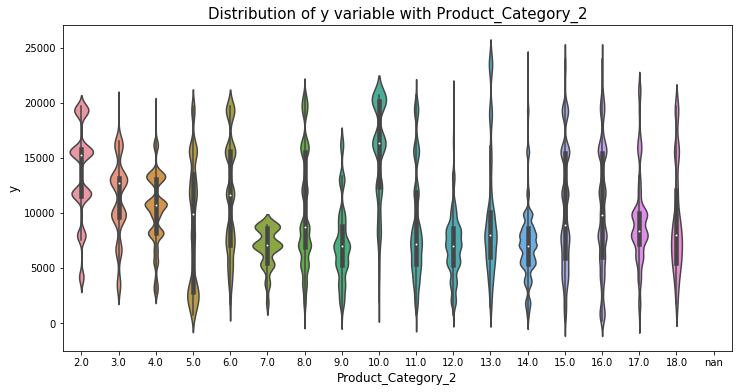

In [37]:
var_name = "Product_Category_2"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='Purchase', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()


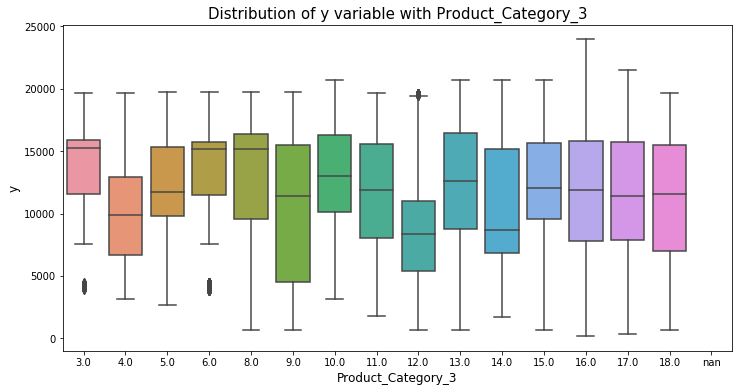

In [39]:
var_name = "Product_Category_3"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='Purchase', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()


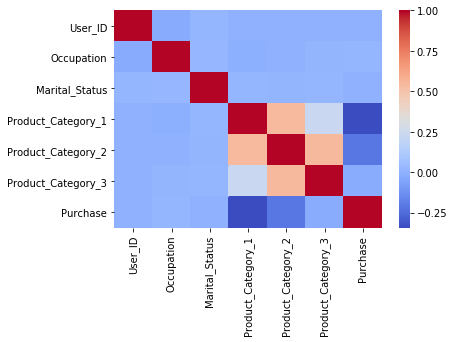

In [46]:
sns.heatmap(train_df.corr(), cmap='coolwarm')

# DATA PREPROCESSING

In [47]:
test_df['gender'] = test_df['Gender'].map({'M':1,'F':'0'}).astype(int)

In [48]:
train_df['gender'] = train_df['Gender'].map({'M':1,'F':'0'}).astype(int)

In [50]:
train_df['city_category_new'] = train_df['City_Category'].map({'A':'0','B':'2','C':'1'}).astype(int)

In [52]:
test_df['city_category_new'] = test_df['City_Category'].map({'A':'0','B':'2','C':'1'}).astype(int)

In [53]:
train_df= train_df.drop(['Gender','City_Category'],axis=1)

In [76]:
median_cat= train_df['Product_Category_3'].dropna().median()
train_df['Product_Category_3'] = train_df['Product_Category_3'].fillna(median_cat).astype(int)

In [77]:
median_cat= train_df['Product_Category_2'].dropna().median()
train_df['Product_Category_2'] = train_df['Product_Category_2'].fillna(median_cat).astype(int)

In [78]:
train_df.head(5)

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,gender,city_category_new
0,0-17,10,2,0,3,9,14,0,0
1,0-17,10,2,0,1,6,14,0,0
2,0-17,10,2,0,12,9,14,0,0
3,0-17,10,2,0,12,14,14,0,0
4,55+,16,4+,0,8,9,14,1,1


In [61]:
U = train_df['User_ID']
P = train_df['Product_ID']


In [ ]:
train_df= train_df.drop(['User_ID','Product_ID'],axis=1)

In [65]:
Y = train_df['Purchase']

In [66]:
train_df= train_df.drop(['Purchase'],axis=1)

In [83]:
test_df.head(5)

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,gender,city_category_new
0,46-50,7,2,1,1,11,14,1,2
1,26-35,17,0,0,3,5,14,1,1
2,36-45,1,4+,1,5,14,14,0,2
3,36-45,1,4+,1,4,9,14,0,2
4,26-35,1,1,0,4,5,12,0,1


In [71]:
test_df= test_df.drop(['Gender','City_Category'],axis=1)

In [74]:
median_cat= test_df['Product_Category_3'].dropna().median()
test_df['Product_Category_3'] = test_df['Product_Category_3'].fillna(median_cat).astype(int)

In [79]:
median_cat= test_df['Product_Category_2'].dropna().median()
test_df['Product_Category_2'] = test_df['Product_Category_2'].fillna(median_cat).astype(int)

In [81]:
User = test_df['User_ID']
Prod = test_df['Product_ID']

In [82]:
test_df= test_df.drop(['User_ID','Product_ID'],axis=1)

# PIVOT FEATURES


In [102]:
tt = pd.read_csv("C:/Users/HP/Black Friday/train.csv")
ty = pd.read_csv("C:/Users/HP/Black Friday/test.csv")


In [106]:
tt[["Occupation", "Purchase"]].groupby(['Occupation'], as_index=False).mean().sort_values(by='Purchase', ascending=False)


,Occupation,Purchase
17,17,9821.478236
12,12,9796.640239
15,15,9778.891163
8,8,9532.592497
14,14,9500.702772
7,7,9425.728223
16,16,9394.464349
5,5,9333.149298
13,13,9306.351061
6,6,9256.535691


In [107]:
tt[["Age", "Purchase"]].groupby(['Age'], as_index=False).mean().sort_values(by='Purchase', ascending=False)


,Age,Purchase
5,51-55,9534.808031
6,55+,9336.280459
3,36-45,9331.350695
2,26-35,9252.690633
4,46-50,9208.625697
1,18-25,9169.663606
0,0-17,8933.464640


In [108]:
tt[["Stay_In_Current_City_Years", "Purchase"]].groupby(['Stay_In_Current_City_Years'], as_index=False).mean().sort_values(by='Purchase', ascending=False)


,Stay_In_Current_City_Years,Purchase
2,2,9320.429810
3,3,9286.904119
4,4+,9275.598872
1,1,9250.145923
0,0,9180.075123


In [109]:
tt[["Product_Category_1", "Purchase"]].groupby(['Product_Category_1'], as_index=False).mean().sort_values(by='Purchase', ascending=False)


,Product_Category_1,Purchase
9,10,19675.570927
6,7,16365.689600
5,6,15838.478550
8,9,15537.375610
14,15,14780.451828
15,16,14766.037037
0,1,13606.218596
13,14,13141.625739
1,2,11251.935384
16,17,10170.759516


In [110]:
tt[["Product_Category_2", "Purchase"]].groupby(['Product_Category_2'], as_index=False).mean().sort_values(by='Purchase', ascending=False)


,Product_Category_2,Purchase
8,10.0,15648.729543
0,2.0,13619.356401
4,6.0,11503.551379
1,3.0,11235.359570
13,15.0,10357.077691
14,16.0,10295.681933
6,8.0,10273.259518
2,4.0,10215.192001
11,13.0,9683.352388
15,17.0,9421.576577


In [111]:
tt[["Product_Category_3", "Purchase"]].groupby(['Product_Category_3'], as_index=False).mean().sort_values(by='Purchase', ascending=False)


,Product_Category_3,Purchase
0,3.0,13939.696574
6,10.0,13505.813441
3,6.0,13194.311043
9,13.0,13185.118703
4,8.0,13024.918882
11,15.0,12339.369900
2,5.0,12117.786889
7,11.0,12091.437673
12,16.0,11981.890642
13,17.0,11769.943001


# PREPROCESSING PIVOT FEATURES

In [114]:
train_df['Occupations'] = train_df['Occupation'].map({9:1 , 19: 1, 20:2, 2:2, 1:2, 10:2, 0:3, 18:3, 3:3, 11:4, 4: 4, 6:4, 13:5, 5:5, 16:5, 7:6, 14:7 ,8:7, 15:8 , 12:8 , 17:9})


In [136]:
train_df['Current_City'] = train_df['Stay_In_Current_City_Years'].map({'0':1, '1':2, '3': 4, '2':5,'4+':3 })


In [151]:
train_df.head(5)

,Marital_Status,gender,city_category_new,Occupations,Current_City,Ages,category_1,category_2,category_3
0,0,0,0,2,5,1,9,2,3
1,0,0,0,2,5,1,11,6,3
2,0,0,0,2,5,1,4,2,3
3,0,0,0,2,5,1,4,2,3
4,0,1,1,5,3,5,8,2,3


In [140]:
train_df['Ages'] = train_df['Age'].map({'0-17':1, '18-25':2, '46-50': 3, '26-35':4,'36-45':5, '55+':5, '51-55':6 })


In [142]:
train_df['category_1'] = train_df['Product_Category_1'].map({19:1, 20:2, 13:3, 12:4, 18:5, 4:5, 11:6, 5:7, 8:8, 17:9, 3:9, 2:10, 14:11, 1:11, 16:12, 15:12, 9:13, 6:13, 7:14, 10:15})


In [144]:
train_df['category_2'] = train_df['Product_Category_2'].map({7:1, 12:1, 14:2, 9:2, 5:3, 11:3, 18:4, 17:4, 13:4, 4:5, 8:5, 16:5, 15:5, 3:6, 6:6, 2:7, 10:8})


In [146]:
train_df['category_3'] = train_df['Product_Category_3'].map({12:1, 4:2, 14:3, 9:3, 18:3, 17:4, 16:4, 11:5, 5:5, 15:5, 8:6, 13:6, 6:6, 10:7, 3:7})


In [148]:
train_df = train_df.drop(['Occupation','Stay_In_Current_City_Years', 'Age', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'],axis=1)

In [150]:
train_df = train_df.drop(['Current_City_new'],axis=1)

In [161]:
from sklearn.model_selection import train_test_split

x = pd.DataFrame(train_df)
y = Y

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [162]:
from sklearn import linear_model
lr = linear_model.LinearRegression()


In [163]:
model = lr.fit(X_train, Y_train)

In [164]:
print("Model score :\n", model.score(X_test,Y_test))

Model score :
 0.628840391719


In [165]:
pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(Y_test, pred))


RMSE is: 
 9350832.52879


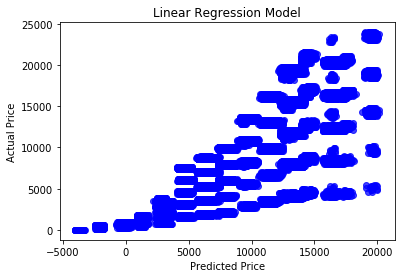

In [166]:
actual_values = Y_test
plt.scatter(pred, actual_values,alpha=.75,color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [167]:
test_df['Occupations'] = test_df['Occupation'].map({9:1 , 19: 1, 20:2, 2:2, 1:2, 10:2, 0:3, 18:3, 3:3, 11:4, 4: 4, 6:4, 13:5, 5:5, 16:5, 7:6, 14:7 ,8:7, 15:8 , 12:8 , 17:9})


In [168]:
test_df['Current_City'] = test_df['Stay_In_Current_City_Years'].map({'0':1, '1':2, '3': 4, '2':5,'4+':3 })


In [169]:
test_df['Ages'] = test_df['Age'].map({'0-17':1, '18-25':2, '46-50': 3, '26-35':4,'36-45':5, '55+':5, '51-55':6 })


In [170]:
test_df['category_1'] = test_df['Product_Category_1'].map({19:1, 20:2, 13:3, 12:4, 18:5, 4:5, 11:6, 5:7, 8:8, 17:9, 3:9, 2:10, 14:11, 1:11, 16:12, 15:12, 9:13, 6:13, 7:14, 10:15})


In [171]:
test_df['category_2'] = test_df['Product_Category_2'].map({7:1, 12:1, 14:2, 9:2, 5:3, 11:3, 18:4, 17:4, 13:4, 4:5, 8:5, 16:5, 15:5, 3:6, 6:6, 2:7, 10:8})


In [172]:
test_df['category_3'] = test_df['Product_Category_3'].map({12:1, 4:2, 14:3, 9:3, 18:3, 17:4, 16:4, 11:5, 5:5, 15:5, 8:6, 13:6, 6:6, 10:7, 3:7})


In [173]:
test_df = test_df.drop(['Occupation','Stay_In_Current_City_Years', 'Age', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'],axis=1)

In [174]:
test_df.head()

,Marital_Status,gender,city_category_new,Occupations,Current_City,Ages,category_1,category_2,category_3
0,1,1,2,6,5,3,11,3,3
1,0,1,1,9,1,4,9,3,3
2,1,0,2,2,3,5,7,2,3
3,1,0,2,2,3,5,5,2,3
4,0,0,1,2,2,4,5,3,1


In [175]:
predi = model.predict(test_df)


In [177]:
submission = pd.DataFrame({"User_ID":User,"Product_ID":Prod, "Purchase":predi})

submission.to_csv('black_friday.csv',index=False)

In [178]:
submiss = pd.DataFrame()


In [179]:
submiss['User_ID'] = User
submiss['Product_ID'] = Prod
submiss['Purchase'] = predi

In [180]:
submiss[['User_ID','Product_ID','Purchase']]

,User_ID,Product_ID,Purchase
0,1000004,P00128942,12859.863600
1,1000009,P00113442,9716.247186
2,1000010,P00288442,6156.826638
3,1000010,P00145342,2893.751189
4,1000011,P00053842,2616.807955
5,1000013,P00350442,11710.583542
6,1000013,P00155442,12911.895186
7,1000013,P0094542,11265.615585
8,1000015,P00161842,19628.058751
9,1000022,P00067942,6108.047984


In [181]:
submiss.to_csv('black_friday_contest.csv',index=False)

In [182]:
train_df.head(5)

,Marital_Status,gender,city_category_new,Occupations,Current_City,Ages,category_1,category_2,category_3
0,0,0,0,2,5,1,9,2,3
1,0,0,0,2,5,1,11,6,3
2,0,0,0,2,5,1,4,2,3
3,0,0,0,2,5,1,4,2,3
4,0,1,1,5,3,5,8,2,3


In [183]:
test_df.head(5)

,Marital_Status,gender,city_category_new,Occupations,Current_City,Ages,category_1,category_2,category_3
0,1,1,2,6,5,3,11,3,3
1,0,1,1,9,1,4,9,3,3
2,1,0,2,2,3,5,7,2,3
3,1,0,2,2,3,5,5,2,3
4,0,0,1,2,2,4,5,3,1


# ANOTHER APPROACH

Skew is: 0.600140003709


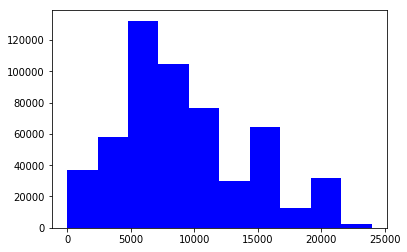

In [188]:
print("Skew is:", tt.Purchase.skew())
plt.hist(tt.Purchase, color = 'blue')
plt.show()

Skew is: -2.20273272258


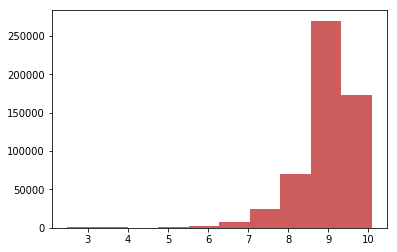

In [189]:
target = np.log(tt.Purchase)
print("Skew is:", target.skew())
plt.hist(target,color='indianred')
plt.show()

In [190]:
yy = np.log(tt.Purchase) #TARGET VARIABLE

In [191]:
x = pd.DataFrame(train_df)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, yy, random_state=42, test_size=0.33)


In [192]:
from sklearn import linear_model
lr = linear_model.LinearRegression()


In [193]:
model = lr.fit(x_train, y_train)

In [194]:
print("Model score :\n", model.score(x_test,y_test))

Model score :
 0.573400146036
